## Importing Libraries
Pandas for loading csv files 
Scikit-Learn for ML libraries 
MatplotLib for plotting graph 

In [1]:
%matplotlib inline

import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree.export import export_text

import warnings
warnings.filterwarnings('ignore')

## Loading the csv file

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv("census1994.csv")

## Printing the first and last 5 records

In [3]:
#return the first 5 rows of the dataset
df_census.head(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#return the last 5 rows of the dataset
df_census.tail(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#return the class types in the df_census data frame
df_census.dtypes

Date              object
Age                int64
WorkClass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

## Removing Null values and ?

In [6]:
df_census = df_census[ df_census != " ?"]
df_census = df_census.dropna()

## Selecting 2 columns 

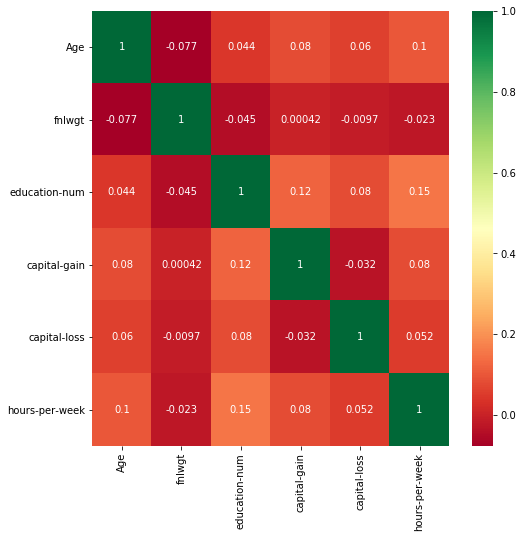

In [7]:
import seaborn as sns
X1 = df_census.drop(columns=['class','Date', 'WorkClass', 'education' , 'marital-status', 'occupation' , 'relationship','race', 'gender', 'native-country'])
y1 = df_census['class'].values
#get correlations of each features in dataset
corrmat = df_census.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_census[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#we select education num and hours-per-week because it has the highest co-relation
selected_columns = ["education-num","hours-per-week"]
target_column = ["class"]

In [9]:
X = df_census[selected_columns].values
y = df_census[target_column].values

## Converting Class to 0's and 1's for ML libraries 

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder().fit(y)
y = labelencoder_Y.transform(y)
y = y.reshape(y.shape[0],1)

## Splitting the data in train and test set with ration of 70%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## 1. Training the first KNN Classifier with 5 neighbors

In [15]:
classifier_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier_1.fit(X_train, y_train)
y_pred = classifier_1.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.7518


## Printing Confusion Matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

 	FALSE	TRUE
FALSE	6291	476
TRUE	1770	512


## Plotting Bar graph to compare Confusion Matrix

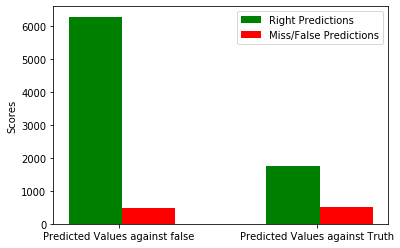

In [17]:
bar_1 = [cm[0][0],cm[1][0]]
bar_2 = [cm[0][1],cm[1][1]]
N = 3
ind = np.arange(2)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = bar_1
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = bar_2
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Scores')
ax.set_xticks(ind + 0.12)
ax.set_xticklabels( ("Predicted Values against false","Predicted Values against Truth") )
ax.legend( (rects1[0], rects2[0]), ('Right Predictions', 'Miss/False Predictions') )

plt.show()

## Printing Classification Report

In [18]:
print(classification_report(y_test, y_pred, target_names=selected_columns))

                precision    recall  f1-score   support

 education-num       0.78      0.93      0.85      6767
hours-per-week       0.52      0.22      0.31      2282

      accuracy                           0.75      9049
     macro avg       0.65      0.58      0.58      9049
  weighted avg       0.71      0.75      0.71      9049



## Building a sample data for graph

In [19]:
X_Plot_True = []
Y_Plot_True = []
X_Plot_False = []
Y_Plot_False = []
X_SAMPLE, _, Y_SAMPLE, _ = train_test_split(X_test, y_test, test_size = 0.90, random_state = 42)
for i,j in zip(X_SAMPLE,Y_SAMPLE):
    if j == 1:
        X_Plot_True.append(i[0])
        Y_Plot_True.append(i[1])
    else:
        X_Plot_False.append(i[0])
        Y_Plot_False.append(i[1])


## Ploting Graph

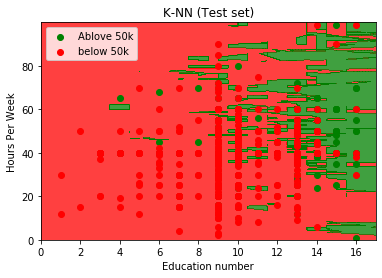

In [20]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_SAMPLE[:, 0].min() - 1, stop = X_SAMPLE[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_SAMPLE[:, 1].min() - 1, stop = X_SAMPLE[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_Plot_True, Y_Plot_True,c = ["Green"], label="Ablove 50k")
plt.scatter(X_Plot_False, Y_Plot_False,c = ["Red"], label="below 50k")
plt.title('K-NN (Test set)')
plt.xlabel('Education number')
plt.ylabel('Hours Per Week')
plt.legend()
plt.show()

## 2. Training the first KNN Classifier with 7 neighbors

In [21]:
classifier_2 = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
classifier_2.fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.7595


## Printing Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

 	FALSE	TRUE
FALSE	6380	387
TRUE	1789	493


## Plotting Bar graph to compare Confusion Matrix

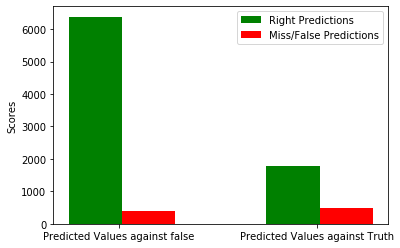

In [23]:
bar_1 = [cm[0][0],cm[1][0]]
bar_2 = [cm[0][1],cm[1][1]]
N = 3
ind = np.arange(2)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = bar_1
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = bar_2
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Scores')
ax.set_xticks(ind + 0.12)
ax.set_xticklabels( ("Predicted Values against false","Predicted Values against Truth") )
ax.legend( (rects1[0], rects2[0]), ('Right Predictions', 'Miss/False Predictions') )


plt.show()

## Printing Classification Report

In [24]:
print(classification_report(y_test, y_pred, target_names=selected_columns))

                precision    recall  f1-score   support

 education-num       0.78      0.94      0.85      6767
hours-per-week       0.56      0.22      0.31      2282

      accuracy                           0.76      9049
     macro avg       0.67      0.58      0.58      9049
  weighted avg       0.73      0.76      0.72      9049



## Building sample data for the graph

In [25]:
X_Plot_True = []
Y_Plot_True = []
X_Plot_False = []
Y_Plot_False = []
X_SAMPLE, _, Y_SAMPLE, _ = train_test_split(X_test, y_test, test_size = 0.90, random_state = 42)
for i,j in zip(X_SAMPLE,Y_SAMPLE):
    if j == 1:
        X_Plot_True.append(i[0])
        Y_Plot_True.append(i[1])
    else:
        X_Plot_False.append(i[0])
        Y_Plot_False.append(i[1])

## Ploting Graph

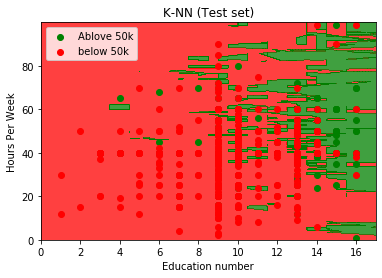

In [26]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_SAMPLE[:, 0].min() - 1, stop = X_SAMPLE[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_SAMPLE[:, 1].min() - 1, stop = X_SAMPLE[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_Plot_True, Y_Plot_True,c = ["Green"], label="Ablove 50k")
plt.scatter(X_Plot_False, Y_Plot_False,c = ["Red"], label="below 50k")
plt.title('K-NN (Test set)')
plt.xlabel('Education number')
plt.ylabel('Hours Per Week')
plt.legend()
plt.show()

## 3. Training the first KNN Classifier with 9 neighbors

In [12]:
classifier_3 = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean', p = 2)
classifier_3.fit(X_train, y_train)
y_pred = classifier_3.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.7661


## Printing Confusion Matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

 	FALSE	TRUE
FALSE	6467	300
TRUE	1817	465


## Plotting Bar graph to compare Confusion Matrix

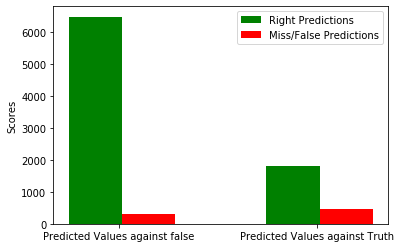

In [14]:
bar_1 = [cm[0][0],cm[1][0]]
bar_2 = [cm[0][1],cm[1][1]]
N = 3
ind = np.arange(2)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = bar_1
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = bar_2
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Scores')
ax.set_xticks(ind + 0.12)
ax.set_xticklabels( ("Predicted Values against false","Predicted Values against Truth") )
ax.legend( (rects1[0], rects2[0]), ('Right Predictions', 'Miss/False Predictions') )

plt.show()

## Printing Classification Report

In [15]:
print(classification_report(y_test, y_pred, target_names=selected_columns))

                precision    recall  f1-score   support

 education-num       0.78      0.96      0.86      6767
hours-per-week       0.61      0.20      0.31      2282

      accuracy                           0.77      9049
     macro avg       0.69      0.58      0.58      9049
  weighted avg       0.74      0.77      0.72      9049



## Building a sample data for graph

In [16]:
X_Plot_True = []
Y_Plot_True = []
X_Plot_False = []
Y_Plot_False = []
X_SAMPLE, _, Y_SAMPLE, _ = train_test_split(X_test, y_test, test_size = 0.90, random_state = 42)
for i,j in zip(X_SAMPLE,Y_SAMPLE):
    if j == 1:
        X_Plot_True.append(i[0])
        Y_Plot_True.append(i[1])
    else:
        X_Plot_False.append(i[0])
        Y_Plot_False.append(i[1])

## Ploting Graph

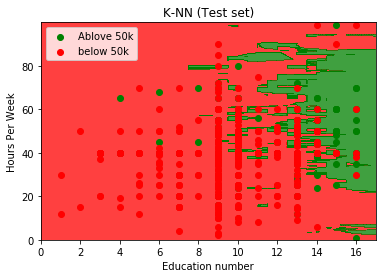

In [17]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_SAMPLE[:, 0].min() - 1, stop = X_SAMPLE[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_SAMPLE[:, 1].min() - 1, stop = X_SAMPLE[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())     

plt.scatter(X_Plot_True, Y_Plot_True,c = ["Green"], label="Ablove 50k")
plt.scatter(X_Plot_False, Y_Plot_False,c = ["Red"], label="below 50k")
plt.title('K-NN (Test set)')
plt.xlabel('Education number')
plt.ylabel('Hours Per Week')
plt.legend()
plt.show()